###### 03 Geometric Machine Learning for Shape Analysis

## D) Unsupervised Learning: Clustering

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE


<center><img src="figs/03_kmeans_intro.png" width=450px alt="default"/></center>

# This Unit

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
  - A) Mean and Covariance
  - B) Supervised Learning: Classification
  - C) Supervised Learning: Regression
  - D) Unsupervised Learning: Clustering
    - Motivation: Classification of Cancer
    - Tangent Machine Learning: Tangent Clustering
    - Geometric Machine Learning: Riemannian K-means
    - Geometric Machine Learning: Riemannian mean-shift
  - E) Unsupervised Learning: Dimension Reduction
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

$\rightarrow$ We explain the machine learning algorithms and statistics used in these real-world scenarios.


# Overview of Machine Learning (ML)

Machine Learning is divided into two principal categories of algorithms: supervised and unsupervised learning algorithms. Both learn from data.

$\color{#EF5645}{\text{Definition}}$: **Unsupervised learning** refers to the task of discovering any naturally occuring patterns in a dataset of data points $x$. We say that the model is:
- a clustering: if we want to find groups (clusters),
- a dimension reduction: if we want to find the main sources of variations.



# Clustering



$\color{#EF5645}{\text{Given}}$:
- dataset $X_1, . . . , X_n$, 
- integer $k$,

$\color{#EF5645}{\text{Goal (Intuition)}}$:
  - Partition/Group/Cluster $n$ vectors into $k$ groups/clusters...
  - ... such that: vectors in the same group are "close".


<center><img src="figs/03_clustering.jpg" width=450px alt="default"/></center>
<center>Inputs: $X_1, ..., X_n \in \mathbb{R}^2$.</center>


# Motivation: Clustering of Cancer

## Brain Shapes: White Matter

White matter is referred to as the "highway of the brain", it transports the information.



$\color{#EF5645}{\text{Question}}$: Given labeled functional connectomes of several subjects, can we predict if a new subject has schizophrenia?

$\color{#EF5645}{\text{Our answer}}$: Classification on manifold:
- input: X = one connectome: is a SPD matrix, i.e. an element of SPD manifold
- output: y is either 0 (healthy control) or 1 (schizophrenia)


# Data

We have:
- 86 connectomes from 86 subjects.
- Among them, 46 are from healthy controls and 40 from schizophrenic subjects.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as mpatches


In [66]:
import geomstats.datasets.utils as data_utils

nerves, labels, monkeys = data_utils.load_optical_nerves()
landmarks = [2, 3, 4]
nerves = nerves[:, landmarks, :]
print(nerves.shape)
print(labels)
print(monkeys)

(22, 3, 3)
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


Plot two optical shapes: 

In [67]:
two_nerves = nerves[monkeys == 0]
print(two_nerves.shape)

two_labels = labels[monkeys == 0]
print(two_labels)

(2, 3, 3)
[0 1]


<Figure size 640x480 with 0 Axes>

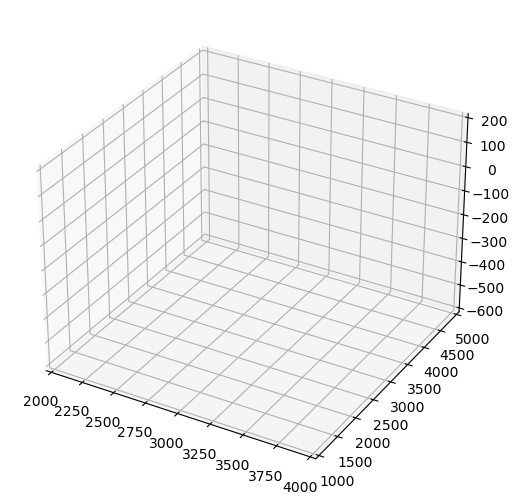

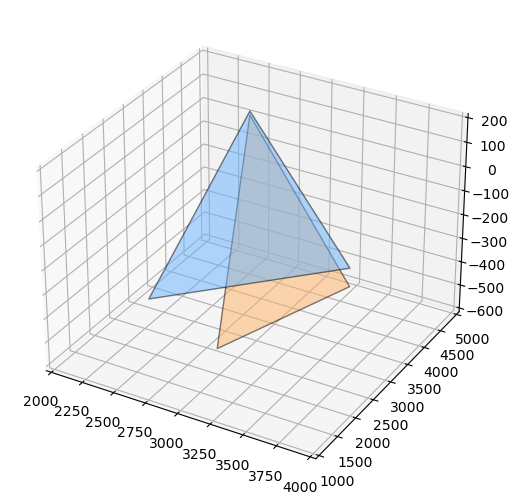

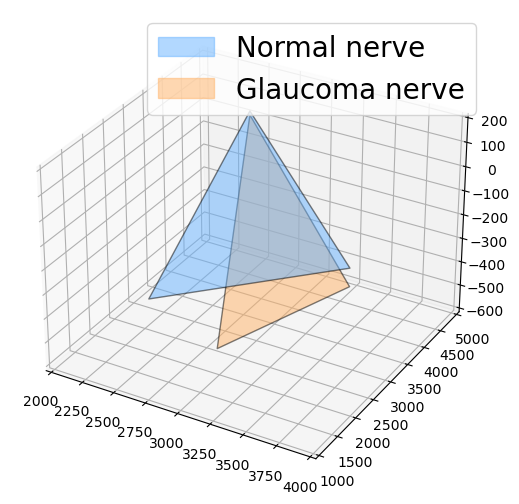

In [68]:
label_to_str = {0: "Normal nerve", 1: "Glaucoma nerve"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim((2000, 4000))
ax.set_ylim((1000, 5000))
ax.set_zlim((-600, 200))

for nerve, label in zip(two_nerves, two_labels):
    x = nerve[:, 0]
    y = nerve[:, 1]
    z = nerve[:, 2]

    verts = [list(zip(x, y, z))]

    poly = Poly3DCollection(verts, alpha=0.5)
    color = label_to_color[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5)
patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 20})
plt.show()

## Clustering Method 1: Tangent Machine Learning

### Recall: "Trick": Tangent Space at the Fréchet Mean

The Fréchet mean gives us a way of transforming our non-linear data into vectors!
1. Compute the Fréchet mean $\bar{x}$ of the data points
2. Consider the tangent space $T_\bar{x}M$of the manifold $M$ at $\bar{x}$
3. Compute the Logarithms of the data points at $\bar{x}$

$\rightarrow$ Get a dataset on a vector space, and apply classical machine learning on it.

$\color{#EF5645}{\text{Remark}}$: Since we have seen Tangent Machine Learning in the previous 2 subsections, we will skip it for clustering.

## Clustering Method 2: Riemannian K-Means

- Review K-Means
- Introduce Riemannian K-Means

# Traditional K-Means

- $\color{#EF5645}{\text{Notations}}$:
  - Group $G_j$ for $j=1, ..., k$: Set of indices in $1, ..., N$ representing which vectors belong to the group.
  - Assignment $c_i$ for $i=1,...,k$: Group that $x_i$ is in: $i \in G_{c_i}$
  - Group representative $z_j$ for $j=1, ..., k$: $n$-vector that represents a typical element of the group $G_j$.

- $\color{#EF5645}{\text{Goal}}$: Find $c_i$ and $z_j$ to minimize $J^{clust} = \frac{1}{N}\sum_{i=1}^N ||x_i - z_{c_i}||^2$
, i.e. the mean square distance from vectors to their representatives.


# K-Means


- Alternate between:
  - (i) update the groups, i.e the group assignments $c_1, ..., c_N$, 
  - (ii) update the representatives $z_1, ..., z_k$.
  
- Such that the objective $J^{clust}$ decreases at each step.

# (i) Update the groups

- Given: representatives $z_1, ..., z_k$
- $\color{#EF5645}{\text{Goal for (i)}}$: Assign vectors to groups, i.e. choose $c_1, ..., c_N$
  - We assign each vector to its nearest representative. Justification:
    - Observe: $c_i$ only appears in term $||x_i - z_{c_i}||^2$ in $J^{clust}$
    - Conclude: to minimize over $c_i$, choose $c_i$ so $‖x_i − z_{c_i} ‖^2 = min_{j \in \{1, ..., k\}} ‖x_i − z_j ‖^2$.

# (ii) Update the representatives

- Given the partition $G_1, . . . , G_k$
- $\color{#EF5645}{\text{Goal for (ii)}}$: Choose representatives $z_1, . . . , z_k$
  - Choose $z_j$ = mean of the points in group $j$. Justification:
    - Observe: $J^{clust}$ splits into a sum of $k$ sums: 
$$J^{clust} = J_1 + · · · + J_k, \quad J_j = \frac{1}{N} \sum_{i \in G_j} ‖x_i − z_j ‖^2.$$
    - Conclude: Choose $z_j$ to minimize its $J_j$: $z_j = \frac{1}{|G_j|} \sum_{i \in G_j} x_i$ = mean/center/centroid.

<center><img src="figs/03_kmeans.jpg" alt="default"/></center>


# Convergence of K-Means

- How many times do we iterate these steps?
  - Until the $z_j$’s stop changing: "convergence" of the algorithm.
- $\color{#EF5645}{\text{Remarks}}$:
  - $J^{clust}$ decreases at each step, 
  - but in general we don't find partition that minimizes $J^{clust}$,
  - the final partition depends on initial representatives.

- $\color{#EF5645}{\text{Recommendation}}$:
  - Run $k$-means 10 times, with different initial representatives
  - Take as final partition the one with smallest $J^{clust}$

<center><img src="figs/03_it0.png" alt="default"/></center>

<center><img src="figs/03_it1.png" alt="default"/></center>

<center><img src="figs/03_it2.png" alt="default"/></center>

<center><img src="figs/03_it3.png" alt="default"/></center>

<center><img src="figs/03_it4.png" alt="default"/></center>

<center><img src="figs/03_it5.png" alt="default"/></center>

<center><img src="figs/03_conv.png" alt="default"/></center>

# From K-Means to Riemannian K-Means

- Replace squared Euclidean norm by squared geodesic norm
- Replace computation of mean by FrechetMean

# Riemannian K-Means

- $\color{#EF5645}{\text{Notations}}$:
  - Group $G_j$ for $j=1, ..., k$: Set of indices in $1, ..., N$ representing which vectors belong to the group.
  - Assignment $c_i$ for $i=1,...,k$: Group that $x_i$ is in: $i \in G_{c_i}$
  - Group representative $z_j$ for $j=1, ..., k$: $n$-vector that represents a typical element of the group $G_j$.

- $\color{#EF5645}{\text{Goal}}$: Find $c_i$ and $z_j$ to minimize $J^{clust} = \frac{1}{N}\sum_{i=1}^N \color{#EF5645}{d(x_i, z_{c_i})}^2$
, i.e. the mean square distance from vectors to their representatives.


# (i) Update the groups

- Given: representatives $z_1, ..., z_k$
- $\color{#EF5645}{\text{Goal for (i)}}$: Assign vectors to groups, i.e. choose $c_1, ..., c_N$
  - We assign each vector to its nearest representative. Justification:
    - Observe: $c_i$ only appears in term $\color{#EF5645}{d(x_i, z_{c_i})}^2$ in $J^{clust}$
    - Conclude: to minimize over $c_i$, choose $c_i$ so $\color{#EF5645}{d(x_i, z_{c_i} )}^2 = min_{j \in \{1, ..., k\}} \color{#EF5645}{d(x_i, z_j )}^2$.

# (ii) Update the representatives

- Given the partition $G_1, . . . , G_k$
- $\color{#EF5645}{\text{Goal for (ii)}}$: Choose representatives $z_1, . . . , z_k$
  - Choose $z_j$ = mean of the points in group $j$. Justification:
    - Observe: $J^{clust}$ splits into a sum of $k$ sums: 
$$J^{clust} = J_1 + · · · + J_k, \quad J_j = \frac{1}{N} \sum_{i \in G_j} d(x_i, z_j)^2.$$
    - Conclude: Choose $z_j$ to minimize its $J_j$: $z_j$  $\color{#EF5645}{\text{Frechet mean/center/centroid.}}$

In [18]:
import matplotlib.pyplot as plt
import numpy as np

import geomstats.visualization as viz
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

## Example: On the Sphere

In [23]:
sphere = Hypersphere(dim=2)
cluster = sphere.random_von_mises_fisher(kappa=20, n_samples=140)

SO3 = SpecialOrthogonal(3)
rotation1 = SO3.random_uniform()
rotation2 = SO3.random_uniform()

cluster_1 = cluster @ rotation1
cluster_2 = cluster @ rotation2

data = np.concatenate((cluster_1, cluster_2), axis=0)

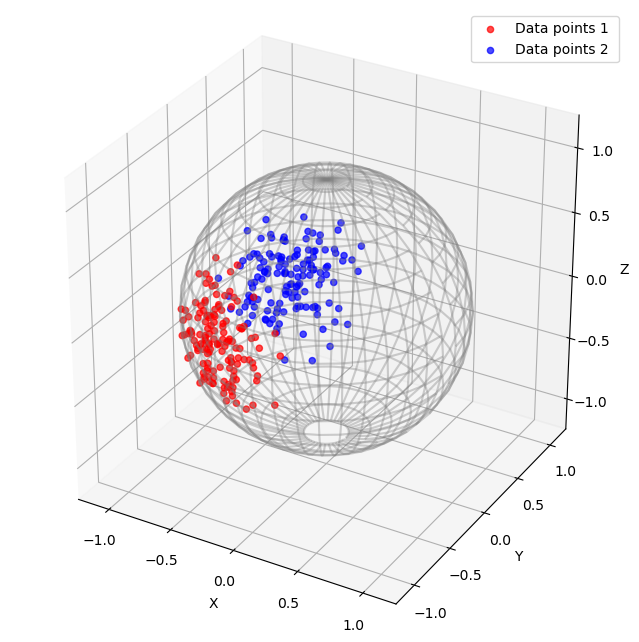

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = viz.plot(
    cluster_1, space="S2", color="red", alpha=0.7, label="Data points 1 "
)
ax = viz.plot(
    cluster_2, space="S2", ax=ax, color="blue", alpha=0.7, label="Data points 2"
)
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend()
plt.show();

- Train: Fit to the data

In [25]:
from geomstats.learning.kmeans import RiemannianKMeans

kmeans = RiemannianKMeans(sphere.metric, 2, tol=1e-3, init_step_size=1.0)
kmeans.fit(data)

- Test: Predict on new data

In [26]:
labels = kmeans.predict(data)
centroids = kmeans.centroids

Plot the results:

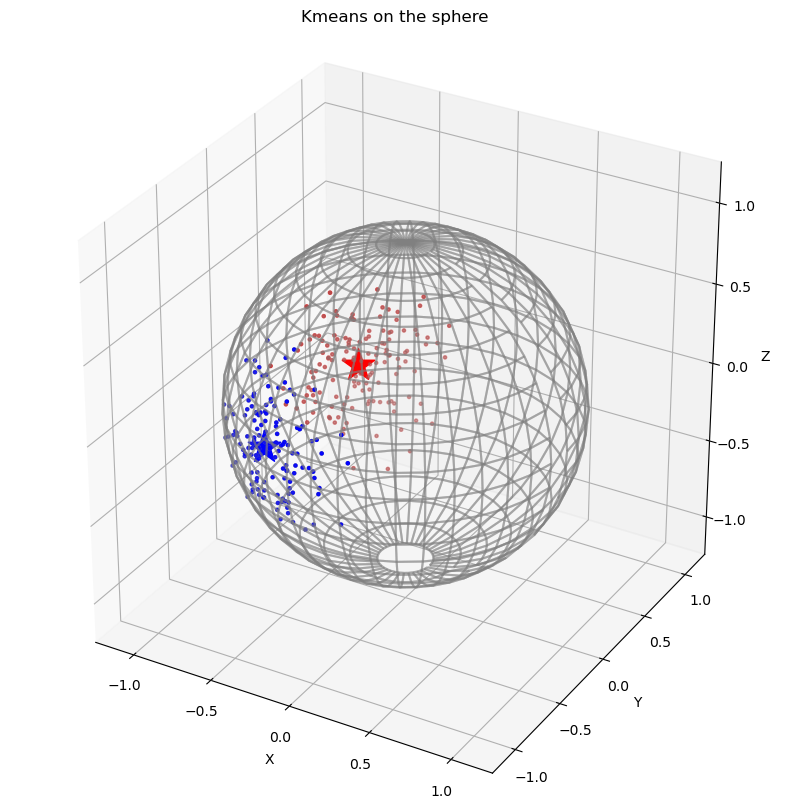

In [35]:
fig = plt.figure(figsize=(10, 10))
colors = ["red", "blue"]

ax = viz.plot(data, space="S2", marker=".", color="grey")

for i in range(2):
    ax = viz.plot(
        points=data[labels == i], ax=ax, space="S2", marker=".", color=colors[i]
    )

for i, c in enumerate(centroids):
    ax = viz.plot(c, ax=ax, space="S2", marker="*", s=600, color=colors[i])

ax.set_title("Kmeans on the sphere")
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
plt.show()

## Example: On Optical Nerve Heads

In [74]:
from geomstats.geometry.pre_shape import PreShapeSpace, KendallShapeMetric

manifold = PreShapeSpace(k_landmarks=3, m_ambient=3)
metric = KendallShapeMetric(k_landmarks=3, m_ambient=3)
nerves = manifold.projection(nerves)
kmeans = RiemannianKMeans(
    metric, n_clusters=2, tol=1e-3, init_step_size=1.0)
kmeans.fit(nerves)

array([[[ 0.43379273, -0.32032008, -0.00960553],
        [-0.32045924,  0.65059716,  0.17970603],
        [-0.11333349, -0.33027708, -0.1701005 ]],

       [[ 0.50156593, -0.37327121,  0.00264641],
        [-0.19678504,  0.60269587,  0.17417035],
        [-0.30478089, -0.22942466, -0.17681677]]])

Recall our question.

$\color{#EF5645}{\text{Question}}$: Given labeled functional connectomes of several subjects, can we predict if a new subject has schizophrenia?

We can use the fitted model to make new predictions.

In [52]:
# kmeans.predict(data)

In our case, the classification accuracy is the same than using the logistic regression.

## Clustering Method 3: Riemannian MeanShift

- Review Traditional Meanshit
- Introduce Riemannian Meanshift


In this case, computing with the data on the manifold directly similar results.

Looking inside `RiemannianMinimumDistanceToMeanClassifier`:
- https://github.com/geomstats/geomstats/blob/master/geomstats/learning/mdm.py

Recall our question.

$\color{#EF5645}{\text{Question}}$: Given labeled functional connectomes of several subjects, can we predict if a new subject has schizophrenia?

We can use the fitted model to make new predictions.

In [57]:
[labels_str[i] for i in mdm.predict(X_test)]

['Healthy',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Healthy',
 'Healthy',
 'Healthy',
 'Schizophrenic',
 'Schizophrenic',
 'Healthy',
 'Schizophrenic',
 'Schizophrenic',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Schizophrenic',
 'Schizophrenic',
 'Schizophrenic',
 'Healthy',
 'Healthy',
 'Healthy']

# This Unit

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
  - A) Mean and Covariance
  - **B) Supervised Learning: Classification**
    - Motivation: Classification of Schizophrenia
    - Tangent Machine Learning: Tangent Classifications
    - Metric Machine Learning: Minimum distance to mean
  - C) Supervised Learning: Regression
  - D) Unsupervised Learning: Clustering
  - E) Unsupervised Learning: Dimension Reduction
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

$\rightarrow$ We explain the machine learning algorithms and statistics used in these real-world scenarios.

<center><img src="figs/00_bioshape.jpg" width=350px alt="default"/></center>
